<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Nets (CNN)

In [0]:
# If necessary, uncommand and run the following line to install pytorch
#!pip install torch torchvision

과거에는 Google Colab를 pytorch를 기본제공하지 않았으므로 Google Colab에서 pytorch를 사용하려면 먼저 pytorch를 설치해야 함.

현재는 불필요함.

In [0]:
import numpy as np
import datetime

**numpy**는 다차원 배열 및 벡터/ 행렬 기본 연산
python으로 data science를 할 때 가장 기본이 되는 라이브러리 중 하나.

**datetime** 학습/실행 시간 측정을 위한 package

In [4]:
import torch
import torchvision            
import torch.nn as nn

print(torch.__version__)

1.0.1.post2


**torch**: pytorch package

**torch.nn**: 신경망 모델에 Class들을 포함

**torchvision**은 computer vision에 많이 사용되는 dataset, model, transform을 포함 (https://pytorch.org/docs/stable/torchvision/index.html)

In [0]:
from torch.utils.data import DataLoader

Data Loader: 데이터 로드를 위한 패키지 (Dataset + Sampler + Iterator)
> * Dataset is an abstract class representing a dataset 
> * Sampler provides a way to iterate over indices of dataset elements


See https://pytorch.org/docs/stable/data.html

In [0]:
from torchvision import datasets
from torchvision import transforms

**dataset**: MNIST, fashion MNIST, COCO, LSUN, CIFAR, etc.

**transforms**: algorithms for preprocessing or data augmentation

See https://pytorch.org/docs/stable/torchvision/index.html to know datasets and transforms in torchvision

# Using (deep) neural networks with python


1. Define a network model

2. Prepare data

3. Train the model

4. Evalute the model

In [0]:
#import matplotlib

%matplotlib inline
from matplotlib.pyplot import imshow, imsave

**matplotlib**: python visualization library

In [8]:
MODEL_NAME = 'DNN'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("MODEL_NAME = {}, DEVICE = {}".format(MODEL_NAME, DEVICE))

MODEL_NAME = DNN, DEVICE = cuda


GPU가 있다면 GPU를 통해 학습을 가속화하고, 없으면 CPU로 학습하기 위해 device를 정해준다.

**torch.cuda.is_avaliable()**은 GPU가 사용가능한지를 판단하는 함수

## Defining a Neural Network model using pytorch

1. Define a neural net model

> * Define a model class inheriting **nn.module**

>> nn.module is the base class of all layers/operators

>* Define **__init__** function (constructor)

>>  Create layers and operators

>* Define **forward** function (forward propagation)

>> Define how to compute the output from the input

> Example

~~~~
    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)           
                   
        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))
~~~~

> Note! You don't need to backpropagation procedure, because pytorch provides **autograd**

In [0]:
class HelloCNN(nn.Module):
    """
        Simple CNN Clssifier
    """
    def __init__(self, num_classes=10):
        super(HelloCNN, self).__init__()
        
        self.conv = nn.Sequential(
            # (N, 1, 28, 28)
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # (N, 32, 14, 14)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # (N, 64, 7, 7)
        )
        self.fc = nn.Sequential(
            nn.Linear(7*7*64, 512),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes),
        )
        
    def forward(self, x):
        y_ = self.conv(x) # (N, 64, 7, 7)
        y_ = y_.view(y_.size(0), -1) # (N, 64*7*7)
        y_ = self.fc(y_)
        return y_

**nn.Sequential()**: a sequential container.

* Example of using Sequential

~~~~
  model = nn.Sequential(
    nn.Conv2d(1,20,5),
    nn.ReLU(),
    nn.Conv2d(20,64,5),
    nn.ReLU()
    )
~~~~
* Example of using Sequential with OrderedDict

~~~~
  model = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(1,20,5)),
    ('relu1', nn.ReLU()),
    ('conv2', nn.Conv2d(20,64,5)),
    ('relu2', nn.ReLU())
    ]))
~~~~

**nn.ModuleList**: a list-like container class 

* Example of using ModuleList

~~~~
  class MyModule(nn.Module):
      def __init__(self):
          super(MyModule, self).__init__()
          self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])
            
      def forward(self, x):
          # ModuleList can act as an iterable, or be indexed using ints
          for i, l in enumerate(self.linears):
               x = self.linears[i // 2](x) + l(x)
          return x
                 
~~~~

In [0]:
model = HelloCNN().to(DEVICE)

Moves and/or casts the parameters and buffers. (CPU or GPU)

## Loading and preprocessing of data



Transform of input data

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),                               # image to tensor
     transforms.Normalize(mean=(0.1307,), std=(0.3081,))  # normalize to "(x-mean)/std"
    ])

**transforms**: torchvision에서 제공하는 transform 함수들이 있는 패키지.

**ToTensor**: numpy array를 torch tensor로 변환.

**Normalize**: 정규화 함수 output[channel] = (input[channel] - mean[channel]) / std[channel]

In [12]:
mnist_train = datasets.MNIST(root='../data/', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='../data/', train=False, transform=transform, download=True)

0it [00:00, ?it/s]

9920512it [00:01, 9240944.23it/s]                            


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136930.80it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2248538.48it/s]                            
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 52056.11it/s]            


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


**datasets**에는 여러 데이터들에 대해 다운로드하고 처리하는 클래스가 내장되어 있음. [참고](https://pytorch.org/docs/stable/torchvision/datasets.html)

root 폴더에 없을 시에 download하고, 앞서 정의한 transform에 따라 전처리 된 데이터를 return함.

In [0]:
batch_size = 64

In [0]:
train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=100, shuffle=False, drop_last=False)

**DataLoader**는 pytorch에서 학습 시에 데이터를 배치 사이즈만큼씩 효율적으로 불러오도록 돕는 클래스. 잘 사용할수록 GPU의 사용률이 올라간다.

**shuffle**: every epochs 마다 데이터의 순서를 랜덤하게 섞는다.

**drop_last**: 데이터의 개수가 배치 사이즈로 나눠떨어지지 않는 경우, 마지막 배치를 버린다. 주로 학습시에만 사용.

## Training neural network model


Training procedure
~~~~
for epoch in range(max_epoch):
    for input, target in dataset:    # retrieve input data and target labels
        optimizer.zero_grad()     # reset gradient
        output = model(input)     # forward propagation
        loss = loss_fn(output, target)  # get loss value
        loss.backward()           # back-propagation (compute gradient)     optimizer.step()          # update parameters with gradient
~~~~

In [0]:
# utility function to measure time

import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [0]:
# set loss function and optimizer

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

**nn.CrossEntropyLoss**: Cross entropy를 계산하는 Loss. softmax가 내부적으로 수행된다.

**optim.Adam**: optim에는 여러 optimizer가 있고, Adam Optimizer는 대표적으로 많이 사용된다.

### Training procedure

첫번째 for문: 원하는 epoch만큼 반복

두번째 for문: training datset에서 배치 사이즈 만큼씩 모두 샘플링 될 때까지 반복.

**Line 2**: MNIST dataset은 DataLoader를 통해 image와 label을 return.

**Line 4**: 각각 Device에 올린다 (GPU or CPU)

**Line 5**: 모델에 이미지를 넣고 forward propagation 한다.

**Line 7**: 결과값 y_hat과 실제 정답 y에 대한 loss를 계산한다.

**zero_grad (Line 9)**: 모델의 gradient를 0으로 초기화한다.

**backward (Line 10)**: loss를 계산하는 것까지 연결되어있는 graph를 따라 gradient를 계산한다.

**step (Line 11)**: 계산된 gradient를 모두 parameter에 적용한다.

**eval (Line 17)**: 모델을 evaluation mode로 바꿔준다 (dropout 조정, Batch normalization 조정 등)

**torch.no_grad (Line 19)**: gradient를 계산하기 위해 추적하는 수고를 하지 않음

**torch.max (Line 24)**: max value와 indices(즉, argmax)를 return.

**train (Line 29)**: evaluation mode였던 모델을 train mode로 전환

In [0]:
# reset loss history
all_losses = []

In [18]:
max_epoch = 5        # maximum number of epochs
step = 0             # initialize step counter variable

plot_every = 200
total_loss = 0 # Reset every plot_every iters

start = time.time()

for epoch in range(max_epoch):
    for idx, (images, labels) in enumerate(train_loader):
        # Training Discriminator
        x, y = images.to(DEVICE), labels.to(DEVICE) # (N, 1, 28, 28), (N, )
        
        y_hat = model(x) # (N, 10)  # forward propagation
       
        loss = criterion(y_hat, y)  # computing loss
        total_loss += loss.item()
          
        optim.zero_grad()           # reset gradient
        loss.backward()             # back-propagation (compute gradient)
        optim.step()                # update parameters with gradient
        
        # periodically print loss
        if step % 500 == 0:
            print('Epoch({}): {}/{}, Step: {}, Loss: {}'.format(timeSince(start), epoch, max_epoch, step, loss.item()))
        
        if (step + 1) % plot_every == 0:
            all_losses.append(total_loss / plot_every)
            total_loss = 0
        
        # periodically evalute model on test data
        if step % 1000 == 0:
            model.eval()
            acc = 0.
            with torch.no_grad():   # disable autograd
                for idx, (images, labels) in enumerate(test_loader):
                    x, y = images.to(DEVICE), labels.to(DEVICE) # (N, 1, 28, 28), (N, )
                    y_hat = model(x) # (N, 10)
                    loss = criterion(y_hat, y)
                    _, indices = torch.max(y_hat, dim=-1)     # find maxmum along the last axis (argmax of each row)
                                                              # ex) max_value, max_idx = torch.max(input, dim)
                    acc += torch.sum(indices == y).item()     # count correctly classified samples
                                                              # torch.sum() returns Tensor. Tensor.item() converts it to a value
            print('*'*20, 'Test', '*'*20)
            print('Step: {}, Loss: {}, Accuracy: {} %'.format(step, loss.item(), acc/len(mnist_test)*100))
            print('*'*46)
            model.train()           # turn to train mode (enable autograd)
        step += 1

Epoch(0m 0s): 0/5, Step: 0, Loss: 2.2575552463531494
******************** Test ********************
Step: 0, Loss: 2.9159839153289795, Accuracy: 9.58 %
**********************************************
Epoch(0m 7s): 0/5, Step: 500, Loss: 0.0489889457821846
Epoch(0m 12s): 1/5, Step: 1000, Loss: 0.0709199458360672
******************** Test ********************
Step: 1000, Loss: 0.011706847697496414, Accuracy: 98.59 %
**********************************************
Epoch(0m 19s): 1/5, Step: 1500, Loss: 0.08090385049581528
Epoch(0m 25s): 2/5, Step: 2000, Loss: 0.006270997226238251
******************** Test ********************
Step: 2000, Loss: 0.019123367965221405, Accuracy: 98.81 %
**********************************************
Epoch(0m 31s): 2/5, Step: 2500, Loss: 0.013506345450878143
Epoch(0m 36s): 3/5, Step: 3000, Loss: 0.010808899998664856
******************** Test ********************
Step: 3000, Loss: 0.016738882288336754, Accuracy: 98.97 %
*********************************************

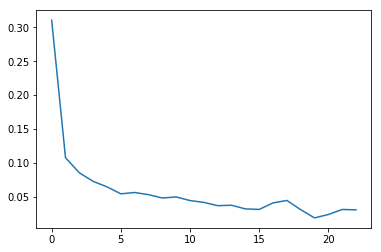

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

## Test and Visualize

In [20]:
# Test
model.eval()
acc = 0.
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        x, y = images.to(DEVICE), labels.to(DEVICE) # (N, 1, 28, 28), (N, )
        y_hat = model(x) # (N, 10)
        loss = criterion(y_hat, y)
        _, indices = torch.max(y_hat, dim=-1)
        acc += torch.sum(indices == y).item()
print('*'*20, 'Test', '*'*20)
print('Step: {}, Loss: {}, Accuracy: {} %'.format(step, loss.item(), acc/len(mnist_test)*100))
print('*'*46)

******************** Test ********************
Step: 4685, Loss: 0.0009241390507668257, Accuracy: 99.02 %
**********************************************


In [21]:
idx = 7777 # 0 to 9999
img, y = mnist_test[idx]
img.shape, y

(torch.Size([1, 28, 28]), 5)

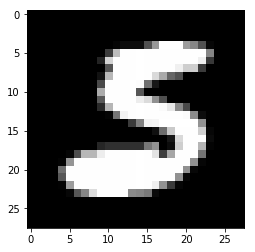

In [22]:
imshow(img[0], cmap='gray')

In [28]:
sample = img.unsqueeze(dim=0).to(DEVICE)
out = model(sample).cpu()
_, idx = out.max(dim=-1)
print("prediction = ", idx.item())

prediction =  5


In [0]:
# Saving params.
torch.save(model.state_dict(), 'model.pkl')